In [1]:
import my_library.common_analysis_tools as ct
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import ROOT


Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

In [3]:
def make_kkpi_histos(df_pipkmks, df_pimkpks, filter):
    hist_pipkmks = df_pipkmks.Histo1D((f'pipkmks_{filter}', f'pipkmks_{filter}', 150, 1.0, 2.5), 'pipkmks_m')
    hist_pimkpks = df_pimkpks.Histo1D((f'pimkpks_{filter}', f'pimkpks_{filter}', 150, 1.0, 2.5), 'pimkpks_m')
    hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pipkmks.SetTitle(f'M(KK#pi) GeV')
    hist_pipkmks.GetXaxis().SetTitle('M(KK#pi) [GeV]')
    hist_pipkmks.GetYaxis().SetTitle('Counts/10MeV')
    hist_pimkpks.SetTitle(f'M(KK#pi) for {filter}')
    hist_pimkpks.GetXaxis().SetTitle('M(KK#pi) [GeV]')
    return hist_pipkmks.GetValue(), hist_pimkpks.GetValue()

def build_legend(hist_pipkmks, hist_pimkpks):
    leg = ROOT.TLegend(0.8, 0.8, 0.9, 0.9)
    leg.AddEntry(hist_pipkmks, 'K^{-}K_{s}#pi^{+}', 'l')
    leg.AddEntry(hist_pimkpks, 'K^{+}K_{s}#pi^{-}', 'l')
    return leg

In [4]:
df_pipkmks = ct.get_dataframe('pipkmks', 'spring', 'data', filtered=False)
df_pimkpks = ct.get_dataframe('pimkpks', 'spring', 'data', filtered=False)
c = ROOT.TCanvas()

In [5]:
n_uncut_pipkmks = df_pipkmks.Count().GetValue()
n_uncut_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_uncut, hist_pimkpks_uncut = make_kkpi_histos(df_pipkmks, df_pimkpks, 'uncut')

uncut pipkmks: 8115588 || uncut pimkpks: 7275220


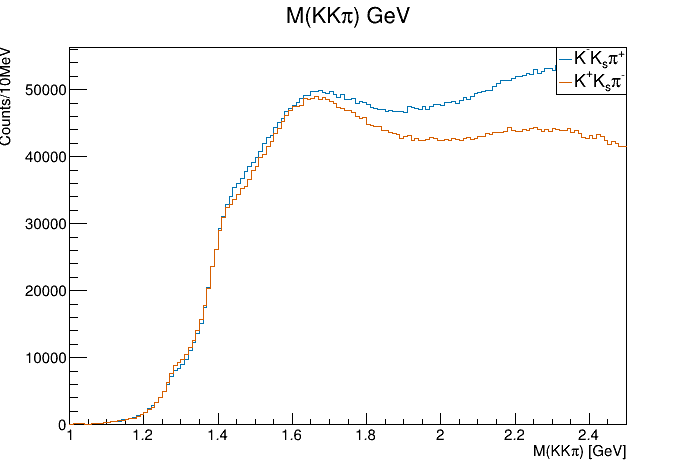

In [6]:
print(f'uncut pipkmks: {n_uncut_pipkmks} || uncut pimkpks: {n_uncut_pimkpks}')
hist_pipkmks_uncut.Draw()
hist_pimkpks_uncut.Draw('same')
legend = build_legend(hist_pipkmks_uncut, hist_pimkpks_uncut)
legend.Draw()
c.Draw()


In [7]:
df_pipkmks = df_pipkmks.Filter(kcuts.MX2_PPIPKMKS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.MX2_PPIMKPKS_CUT)
n_mx2all_pipkmks = df_pipkmks.Count().GetValue()
n_mx2all_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_mx2all, hist_pimkpks_mx2all = make_kkpi_histos(df_pipkmks, df_pimkpks, 'mx2all')

mx2 all cut pipkmks: 6036698 || pimkpks: 5500779
mx2 all efficiency pipkmks: 0.7438398795010294 || pimkpks: 0.756097959924236


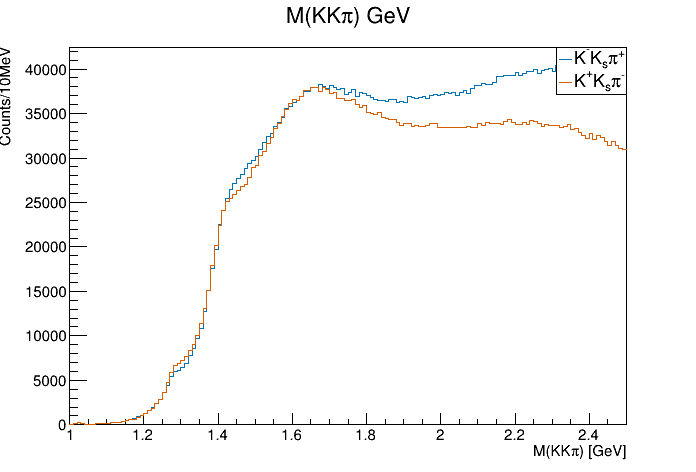

In [8]:
print(f'mx2 all cut pipkmks: {n_mx2all_pipkmks} || pimkpks: {n_mx2all_pimkpks}')
print(f'mx2 all efficiency pipkmks: {n_mx2all_pipkmks/n_uncut_pipkmks} || pimkpks: {n_mx2all_pimkpks/n_uncut_pimkpks}')
hist_pipkmks_mx2all.Draw()
hist_pimkpks_mx2all.Draw('same')
legend.Draw()
c.Draw()

In [9]:
df_pipkmks = df_pipkmks.Filter(kcuts.KS_PATHLENGTH_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KS_PATHLENGTH_CUT)
n_kspl_pipkmks = df_pipkmks.Count().GetValue()
n_kspl_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kspl, hist_pimkpks_kspl = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kspl')



palthlength filtered pipkmks: 1796945 || pathlength filtered pimkpks: 1526908
cut efficiency pipkmks = 0.2976701832690653 || cut efficiency pimkpks = 0.2775803208963676


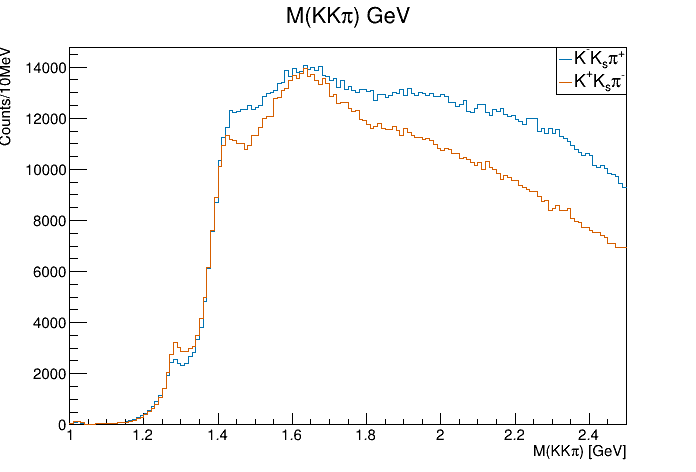

In [10]:
print(f'palthlength filtered pipkmks: {n_kspl_pipkmks} || pathlength filtered pimkpks: {n_kspl_pimkpks}')
print(f'cut efficiency pipkmks = {n_kspl_pipkmks/n_mx2all_pipkmks} || cut efficiency pimkpks = {n_kspl_pimkpks/n_mx2all_pimkpks}')
hist_pipkmks_kspl.Draw()
hist_pimkpks_kspl.Draw('same')
legend.Draw()
c.Draw()


In [11]:
df_pipkmks = df_pipkmks.Filter(kcuts.KS_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KS_MASS_CUT)
n_ksm_pipkmks = df_pipkmks.Count().GetValue()
n_ksm_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_ksm, hist_pimkpks_ksm = make_kkpi_histos(df_pipkmks, df_pimkpks, 'ks_m_cut')

kshort mass cut pipkmks: 1377015 || kshort mass cut pimkpks: 1127361
kshort mass cut efficiency pipkmks: 0.76630892987821 || pimkpks 0.738329355796158


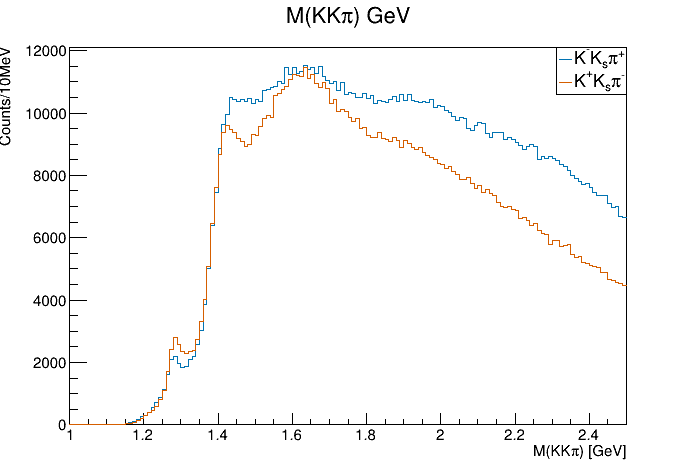

In [12]:
print(f'kshort mass cut pipkmks: {n_ksm_pipkmks} || kshort mass cut pimkpks: {n_ksm_pimkpks}')
print(f'kshort mass cut efficiency pipkmks: {n_ksm_pipkmks / n_kspl_pipkmks} || pimkpks {n_ksm_pimkpks / n_kspl_pimkpks}')
hist_pipkmks_ksm.Draw()
hist_pimkpks_ksm.Draw('same')
legend.Draw()
c.Draw()

In [13]:
df_pipkmks = df_pipkmks.Filter(kcuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.P_P_CUT)
n_pp_pipkmks = df_pipkmks.Count().GetValue()
n_pp_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_pp, hist_pimkpks_pp = make_kkpi_histos(df_pipkmks, df_pimkpks, 'pp')

proton momentum cut pipkmks: 1288601 || pimkpks: 1044388
proton momentum cut efficiency pipkmks: 0.9357930015286688 || pimkpks: 0.926400682656221


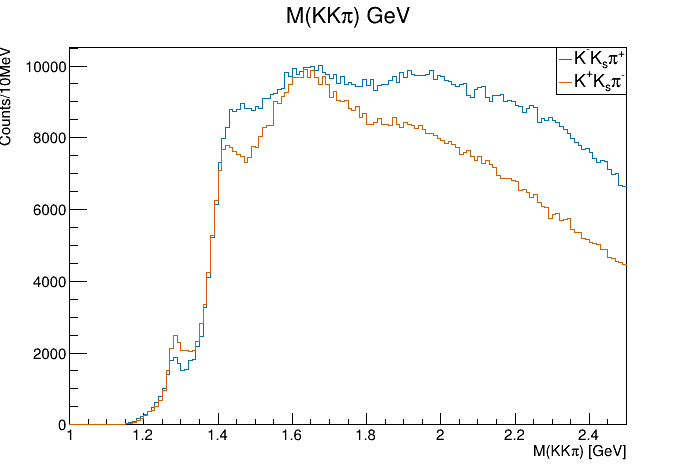

In [14]:
print(f'proton momentum cut pipkmks: {n_pp_pipkmks} || pimkpks: {n_pp_pimkpks}')
print(f'proton momentum cut efficiency pipkmks: {n_pp_pipkmks/n_ksm_pipkmks} || pimkpks: {n_pp_pimkpks/n_ksm_pimkpks}')
hist_pipkmks_pp.Draw()
hist_pimkpks_pp.Draw('same')
legend.Draw()
c.Draw()

In [15]:
df_pipkmks = df_pipkmks.Filter(kcuts.PPIP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.PPIM_MASS_CUT)
n_ppi_pipkmks = df_pipkmks.Count().GetValue()
n_ppi_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_ppi, hist_pimkpks_ppi = make_kkpi_histos(df_pipkmks, df_pimkpks, 'ppi')

n ppi cut pipkmks: 933342 || pimkpks: 860657
ppi cut efficicnecy pipkmks: 0.7243064377569162 || pimkpks: 0.824077833142472


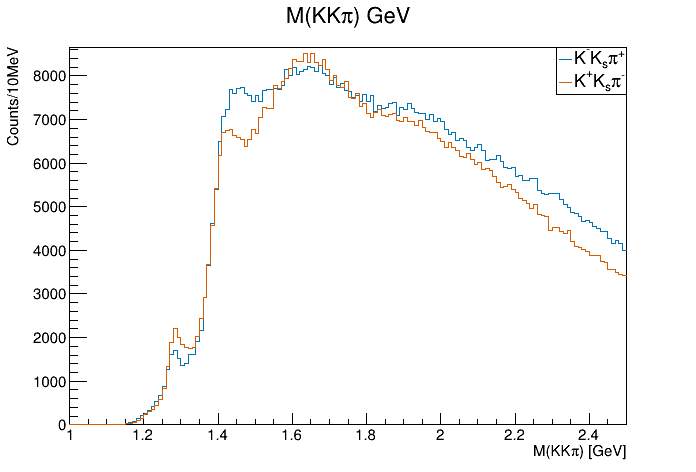

In [16]:
print(f'n ppi cut pipkmks: {n_ppi_pipkmks} || pimkpks: {n_ppi_pimkpks}')
print(f'ppi cut efficicnecy pipkmks: {n_ppi_pipkmks / n_pp_pipkmks} || pimkpks: {n_ppi_pimkpks / n_pp_pimkpks}')
hist_pipkmks_ppi.Draw()
hist_pimkpks_ppi.Draw('same')
legend.Draw()
c.Draw()

In [17]:
df_pipkmks = df_pipkmks.Filter(kcuts.KMP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KSP_MASS_CUT)
n_kmp_pipkmks = df_pipkmks.Count().GetValue()
n_ksp_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kp, hist_pimkpks_kp = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kp')

n kp cut pipkmks: 638814 || pimkpks: 632888
kp cut efficiency pipkmks: 0.6844372159401377 || pimkpks: 0.735354502432444


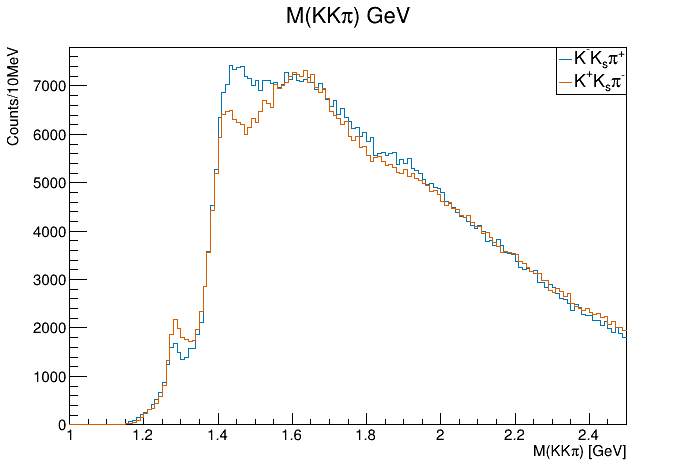

In [18]:
print(f'n kp cut pipkmks: {n_kmp_pipkmks} || pimkpks: {n_ksp_pimkpks}')
print(f'kp cut efficiency pipkmks: {n_kmp_pipkmks/n_ppi_pipkmks} || pimkpks: {n_ksp_pimkpks/n_ppi_pimkpks}')
hist_pipkmks_kp.Draw()
hist_pimkpks_kp.Draw('same')
legend.Draw()
c.Draw()